In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from skimage import io
from skimage.morphology import opening, closing
from skimage.morphology import disk

from LDA import LDA

In [32]:
data = [[1.2, 1.1, 0],
        [2.9, 0.4, 0],
        [1.7, -2.7, 0],
        [1.8, -0.3, 0],
        [3.2, 1.3, 0],
        [3.1, -0.9, 0],
        [0.5, 1.7, 1],
        [1.4, -2.1, 1],
        [2.7, -0.8, 1],
        [2.0, 0.5, 1]]
data = np.reshape(data, (10, 3))
X = data[:,[0,1]]
T = data[:,2]

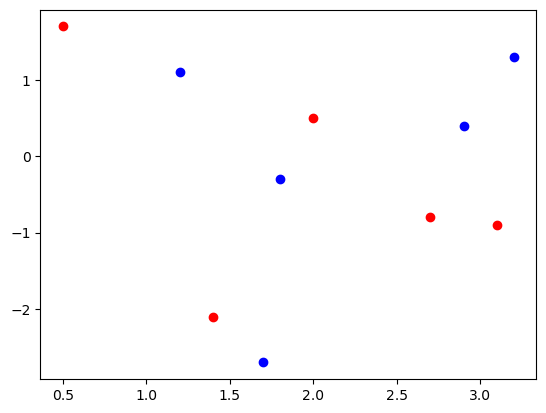

In [38]:
plt.scatter(X[np.arange(5),0], X[np.arange(5),1], color='b')
plt.scatter(X[np.arange(5,10),0], X[np.arange(5,10),1], color='r')
plt.show()

In [25]:
W = LDA(X, T)
Y = np.c_[np.ones((len(X), 1)), X] @ W.T
PosteriorProb = np.clip(np.exp(Y) / np.sum(np.exp(Y),1)[:,np.newaxis], 0, 1)

In [46]:
posteriorC1 = np.zeros(X.shape[0])
posteriorC2 = np.zeros(X.shape[0])

posteriorC1 = PosteriorProb[:,0]
posteriorC2 = PosteriorProb[:,1]

mask_passive = posteriorC1 >= 0.5
mask_active = posteriorC2 >= 0.5

print(mask_active[6:])

# Two active volcanoes are wrongly classified as passive

print(posteriorC2[6:])

[ True  True False False]
[0.69125963 0.54004771 0.26885201 0.39110718]
